# Covid Wizards Figures 
Reproducing the figures using python - poc for portal 
Using draft of the data from early Feb2021 (see email thread 'COVID Wizards - Figures so far' from 11Feb2021++

In [1]:
#utility imports
from os import listdir 
from os.path import isfile, join

# data wrangling
import pandas as pd
import numpy as np

# images
from pdf2image import convert_from_path
from IPython.display import Image

In [2]:
# utility imports  & functions
# convert pdf figures from dialog with authors into jpeg for display in notebook

def convert_pdf_2_jpeg(pdf_folder, pdf_file, jpeg_folder, verbose=False):
    jpeg_files=[]
    try:
        pages = convert_from_path(pdf_folder + pdf_file, 500)
    except:
        if verbose:
            print("unable to convert: ", pdf_folder + pdf_file)
        return 
    use_counter = False
    jpeg_root = pdf_file.rstrip(".pdf") # strip '.pdf' suffix off pdf_file
    if verbose: 
        print("jpeg_root: ",jpeg_root)
    if (len(pages)>1):
        use_counter = True
    if verbose:
        print("len(pages): ",len(pages))
        counter = ord("a")
    for page in pages:
        if use_counter:
            jpeg_file = jpeg_folder + jpeg_root + chr(counter) + ".jpg"
            counter += 1
        else: 
             jpeg_file = jpeg_folder + jpeg_root + ".jpg"
        print("creating: ",jpeg_file)
        page.save(jpeg_file, 'JPEG')
        jpeg_files.append(jpeg_file)
    return(jpeg_files)

convert the pdf figures generated by the team to jpeg so we can view them side-by-side with local creations in this notebook:

In [3]:
# convert latest set of pdf figures to jpeg (required to view in jupyter)
pdf_folder = "figures_round1/"
jpeg_files = []
jpeg_folder = pdf_folder # put them into the same folder as the pdfs
files = [f for f in listdir(pdf_folder) if isfile(join(pdf_folder, f))]
# print("folder files: ",files)
for file in files:
    file_path = pdf_folder + file
    retObj = convert_pdf_2_jpeg(pdf_folder, file, jpeg_folder)
    if retObj:
        for fff in retObj:
            jpeg_files.append(fff)
    else:
        pass # nothing to process
# print("jpeg_files: ", jpeg_files)

creating:  figures_round1/Figure_1_Flowchart_Diagram.jpg
creating:  figures_round1/Figure_2_Metasignature_and_QC.jpg
creating:  figures_round1/Figure_3_Top_Genes.jpg
creating:  figures_round1/Figure_4_Inteferon_Immune_Response.jpg
creating:  figures_round1/Figure_5_Cell_Cycle.jpg
creating:  figures_round1/Supplemental_Figure_1.jpg
creating:  figures_round1/Supplemental_Figure_2.jpg
creating:  figures_round1/Supplemental_Table_I.jpg
creating:  figures_round1/Table_I_pharmaco_atlas.jpg


open the dataset and copy it to a working panda frame

In [4]:
data_file_path = "
pandas.read_csv(filename, sep='\t', lineterminator='\r')

SyntaxError: EOL while scanning string literal (<ipython-input-4-1d7fb39b9fe1>, line 1)

# Figure 2

['figures_round1/Figure_1_Flowchart_Diagram.jpg', 'figures_round1/Figure_2_Metasignature_and_QC.jpg', 'figures_round1/Figure_3_Top_genes.jpg', 'figures_round1/Figure_4_Inteferon_Immune_Response.jpg', 'figures_round1/Figure_5_Cell_Cycle.jpg', 'figures_round1/Supplemental_Figure_1.jpg', 'figures_round1/Supplemental_Figure_2.jpg', 'figures_round1/Supplemental_Table_I.jpg', 'figures_round1/Table_I_pharmaco_atlas.jpg']


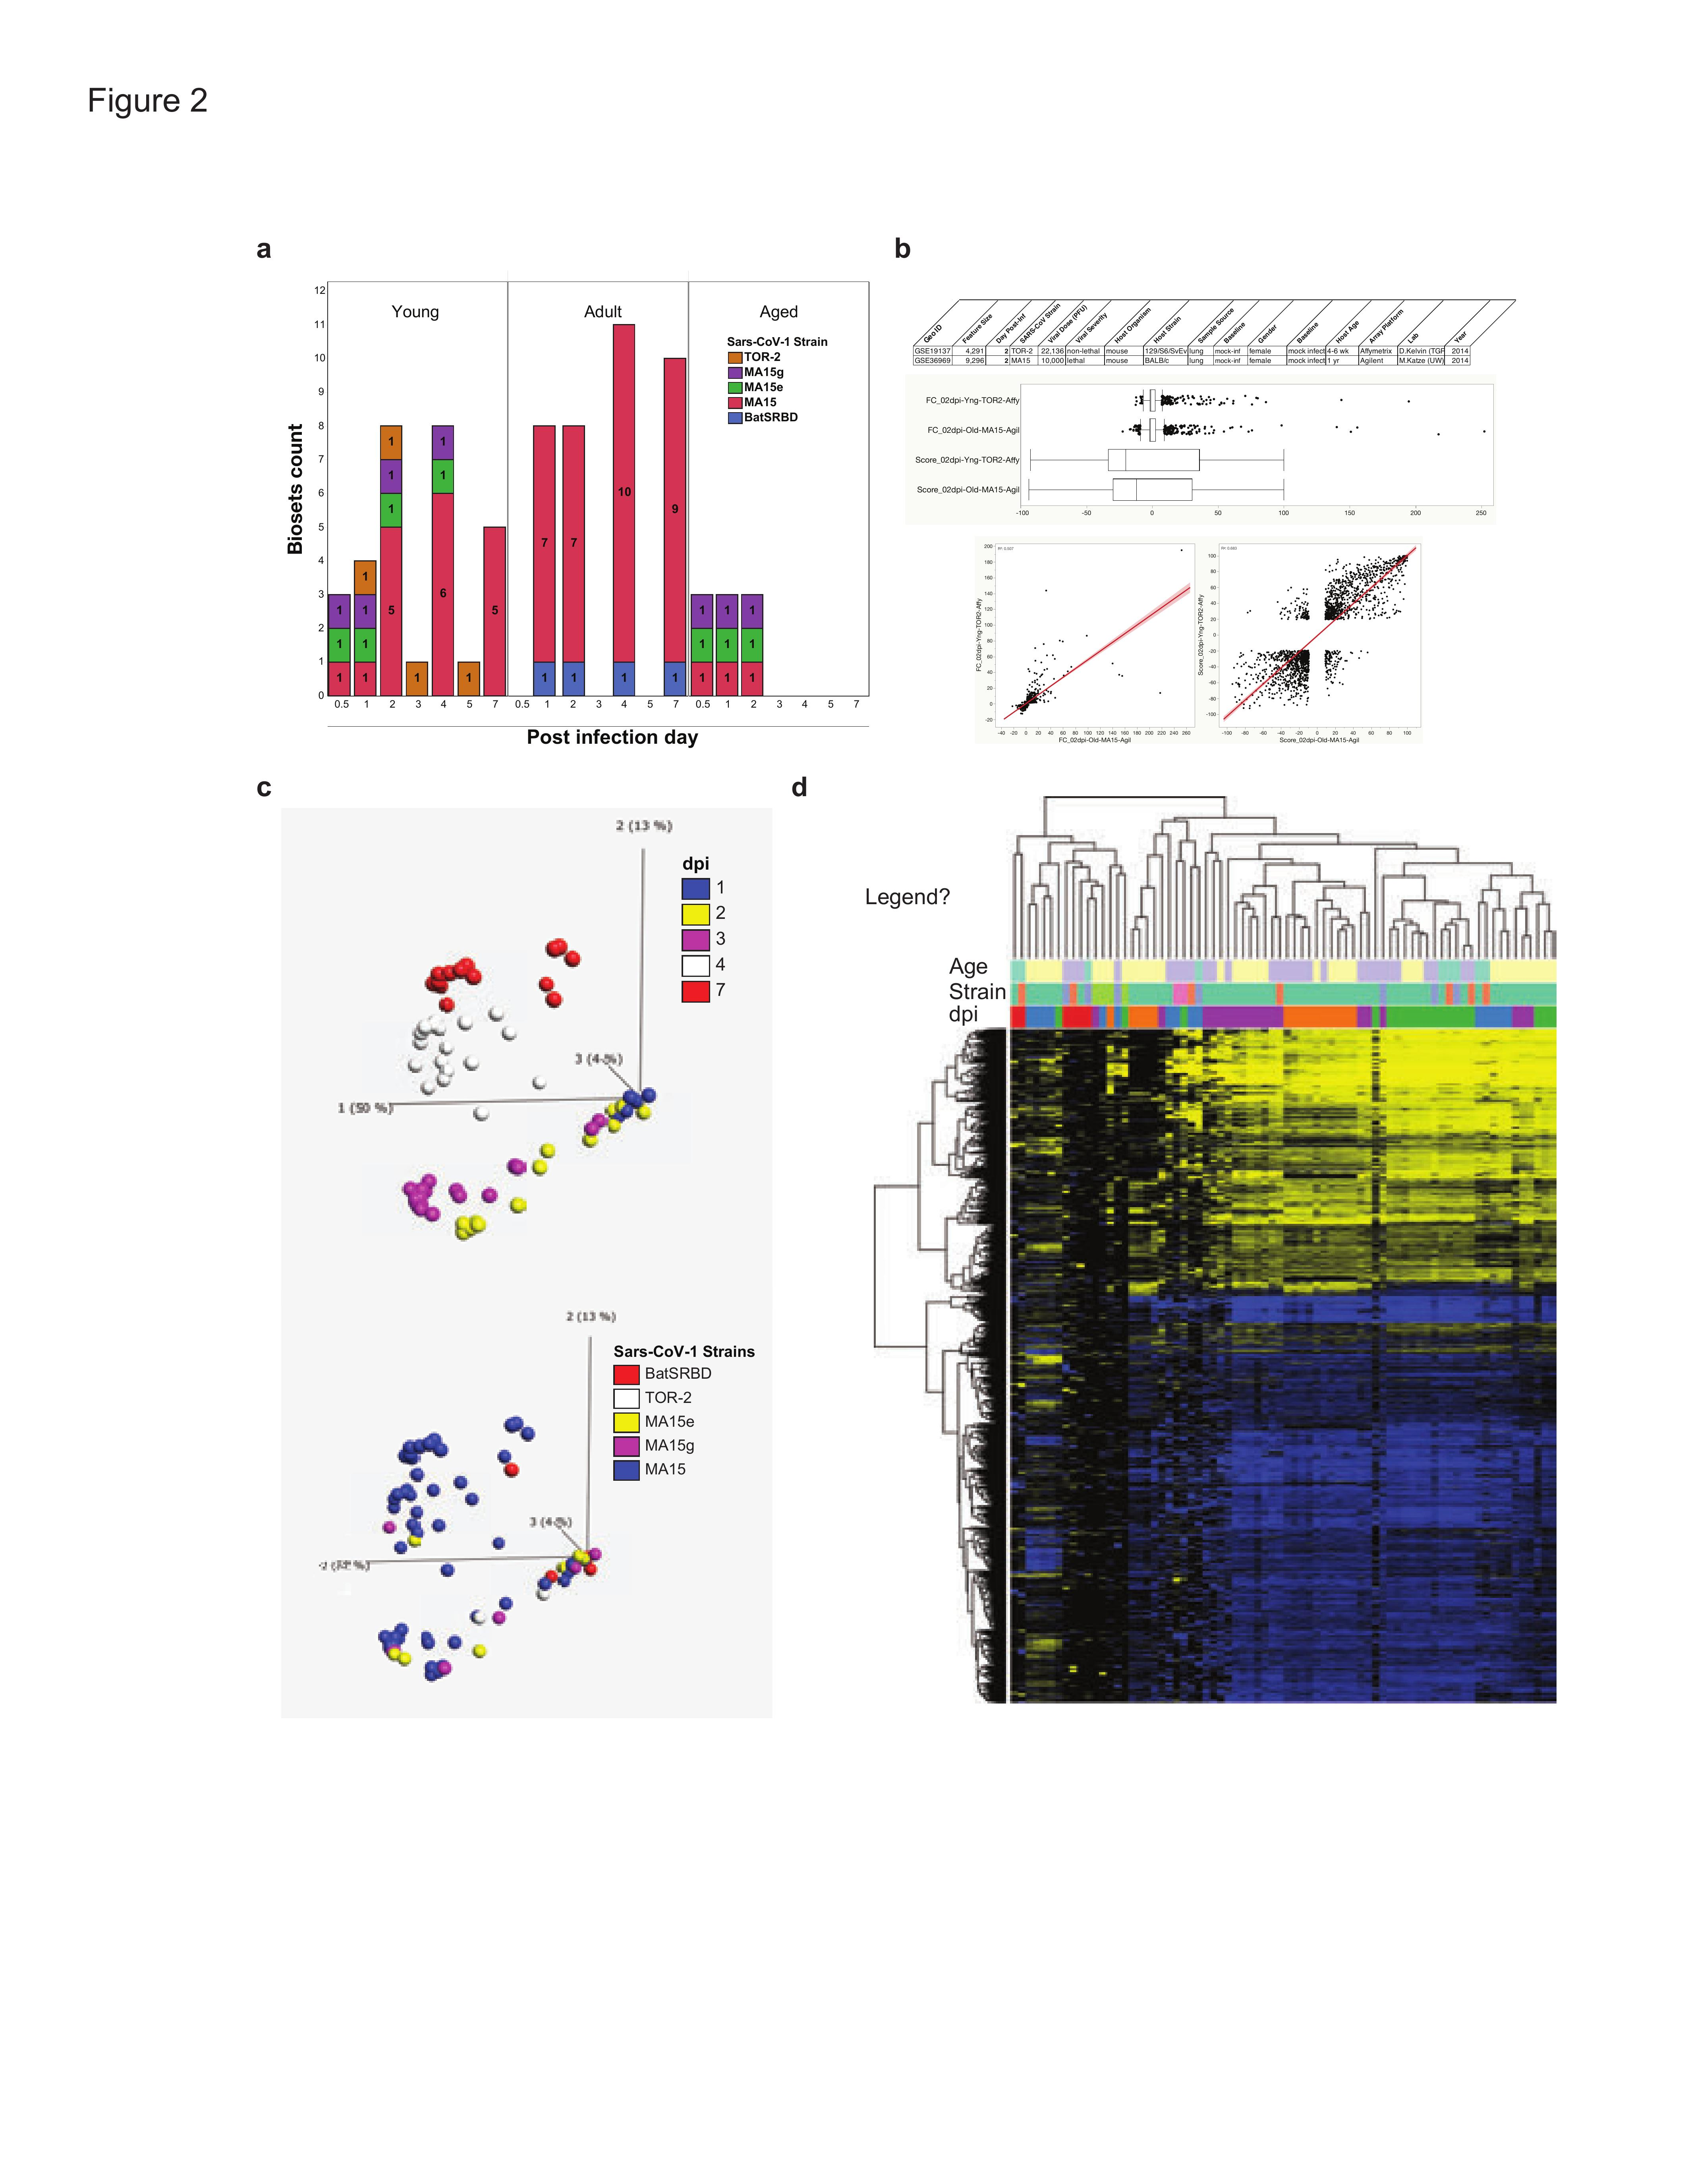

In [60]:
print(jpeg_files)
Image(jpeg_files[1])